In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# Load the data
df = pd.read_csv('medical_research_data.csv')

# Split the data into features and target
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']
y.head()


0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Heart_Disease, dtype: float64

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')



Epoch 1/50


/home/nabiizy/Code/python/lectures/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3587 - loss: 0.7144 - val_accuracy: 0.3125 - val_loss: 0.7285
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4176 - loss: 0.6796 - val_accuracy: 0.5625 - val_loss: 0.7108
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4328 - loss: 0.6787 - val_accuracy: 0.5625 - val_loss: 0.6939
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6149 - loss: 0.6522 - val_accuracy: 0.5625 - val_loss: 0.6783
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6289 - loss: 0.6437 - val_accuracy: 0.6250 - val_loss: 0.6628
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7406 - loss: 0.6231 - val_accuracy: 0.6250 - val_loss: 0.6474
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7277 - loss: 0.5967 - val_accuracy: 0.6875 - val_loss: 0.6332
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7256 - loss: 0.6222 - val_accuracy: 0.7500 - val_loss: 0.6216
Epoch 9/50
7/7 ━━━

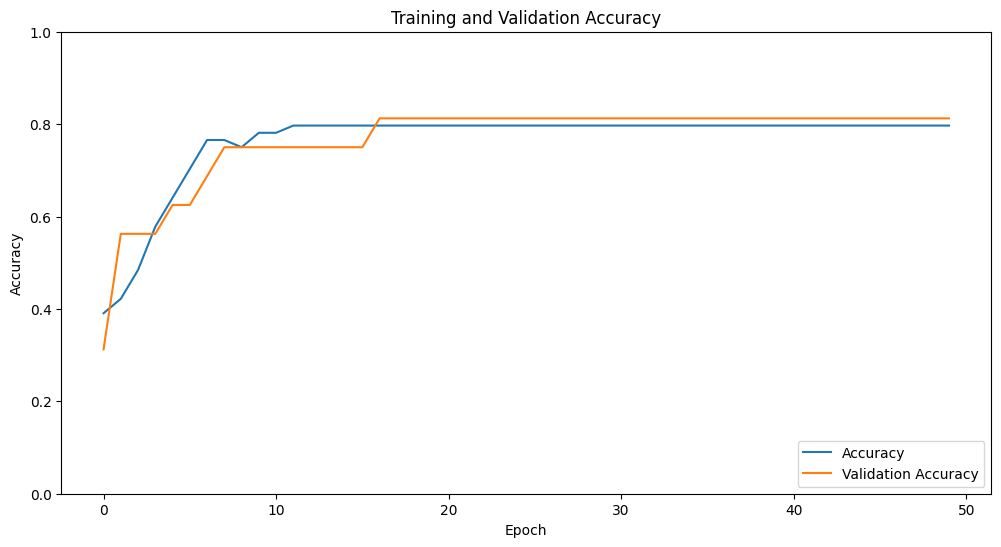

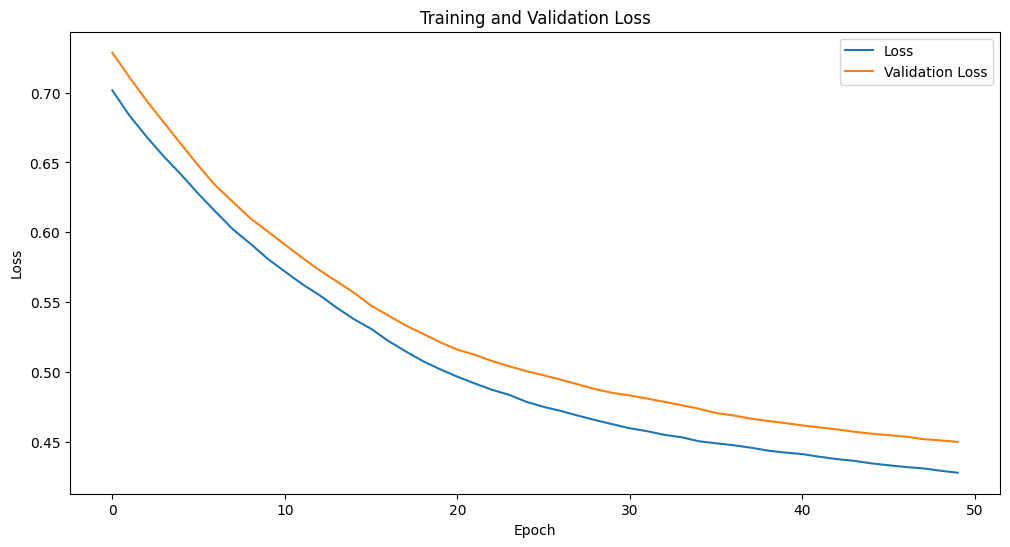

In [9]:
# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
def predict_heart_disease(input_data):
    """
    Predict the probability of heart disease for the given input data.

    Parameters:
    input_data (dict): A dictionary containing the input features with the following keys:
                       - Age
                       - Height
                       - Weight
                       - Blood_Pressure
                       - Cholesterol
                       - Smoker (0 or 1)
                       - Exercise (0, 1, or 2)

    Returns:
    float: The predicted probability of heart disease.
    """

    # Convert input data to DataFrame for consistency with training data
    input_df = pd.DataFrame([input_data])
    
    # Ensure the order of columns matches the training data
    feature_columns = ["Age", "Height", "Weight", "Blood_Pressure", "Cholesterol", "Smoker", "Exercise"]
    input_df = input_df[feature_columns]
    
    # Standardize the input data
    input_scaled = scaler.transform(input_df)
    
    # Make prediction using the trained model
    prediction = model.predict(input_scaled)
    
    # Return the predicted probability of heart disease
    return prediction[0][0]


new_data = {
    "Age": 60,
    "Height": 170,
    "Weight": 75,
    "Blood_Pressure": 180,
    "Cholesterol": 230,
    "Smoker": 1,
    "Exercise": 0
}

predicted_probability = predict_heart_disease(new_data)
print(f"Predicted probability of heart disease: {predicted_probability:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted probability of heart disease: 0.99
